In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import sinter
from typing import List, Dict, Any
import sys
sys.path.append('..')
from plot_utils import estimate_threshold, plot_stats, plot_stats_bias
%matplotlib inline

In [28]:
# File to load
file = "XZZXArchitectureWaterfall_23/results.csv"
stats = sinter.read_stats_from_csv_files(file)
etas = [100]#0.5, 1, 10, 100, 1000, 10000]
logical_error_per_round = True

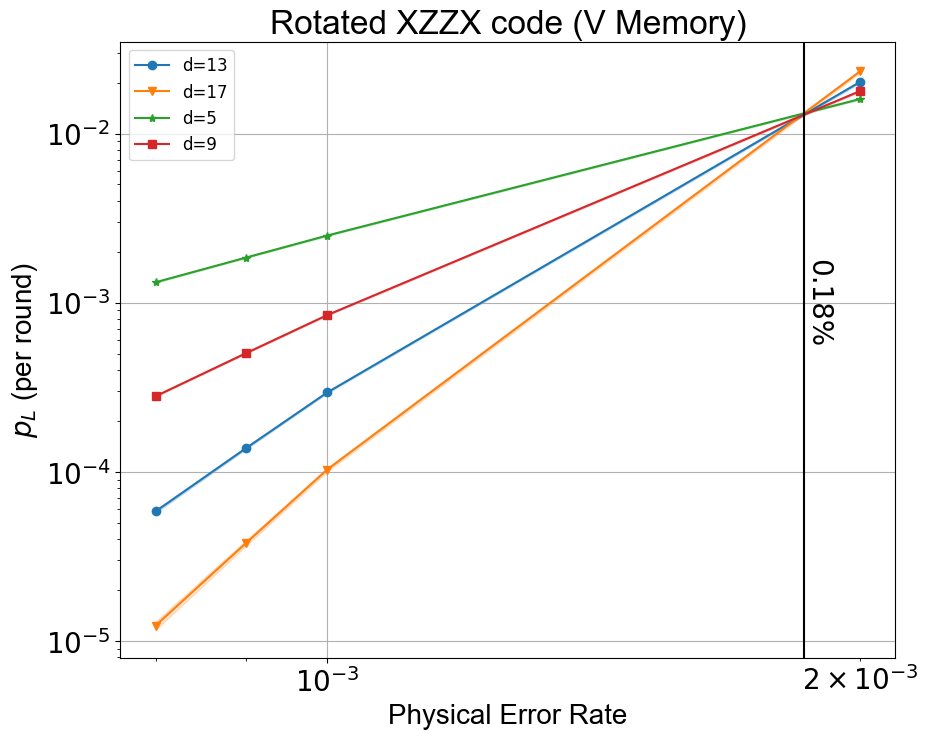

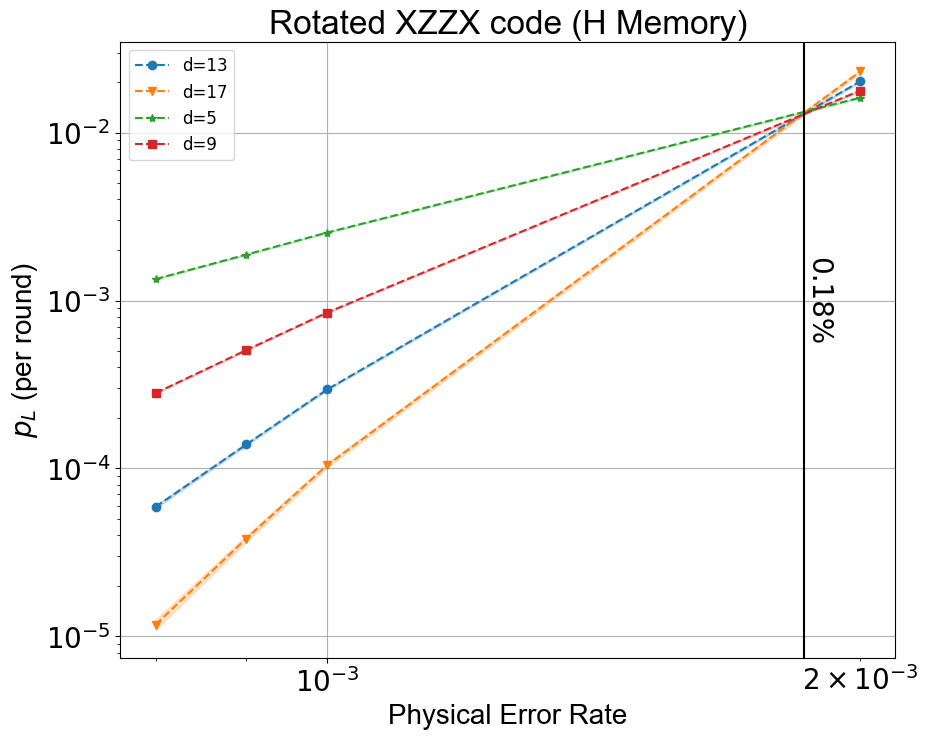

In [30]:
for eta in etas:
    stats_V = [stat for stat in stats if stat.json_metadata['memory'] == "V" and stat.json_metadata["eta"] == eta]
    stats_H = [stat for stat in stats if stat.json_metadata['memory'] == "H" and stat.json_metadata["eta"] == eta]

    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    plot_stats(stats_V, ax=ax, logical_error_per_round=logical_error_per_round)
    ax.set_title(f'Rotated XZZX code (V Memory)',fontname='Arial')
    plt.axvline(x=0.00186, color='black')
    plt.text(0.00186, 0.001, "0.18%", rotation=270, verticalalignment='center')


    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    plot_stats(stats_H, ax=ax, logical_error_per_round=logical_error_per_round)
    ax.set_title(f'Rotated XZZX code (H Memory)',fontname='Arial')
    plt.axvline(x=0.00186, color='black')
    plt.text(0.00186, 0.001, "0.18%", rotation=270, verticalalignment='center')


plt.rcParams.update({'font.size': 20})

    

## Estimate Thresholds

[(0.5, 0.0018, 0.0018), (1, 0.0018, 0.0018), (10, 0.0018, 0.0018), (100, 0.0018, 0.0018), (1000, 0.0018, 0.0018), (10000, 0.0018, 0.0018)]


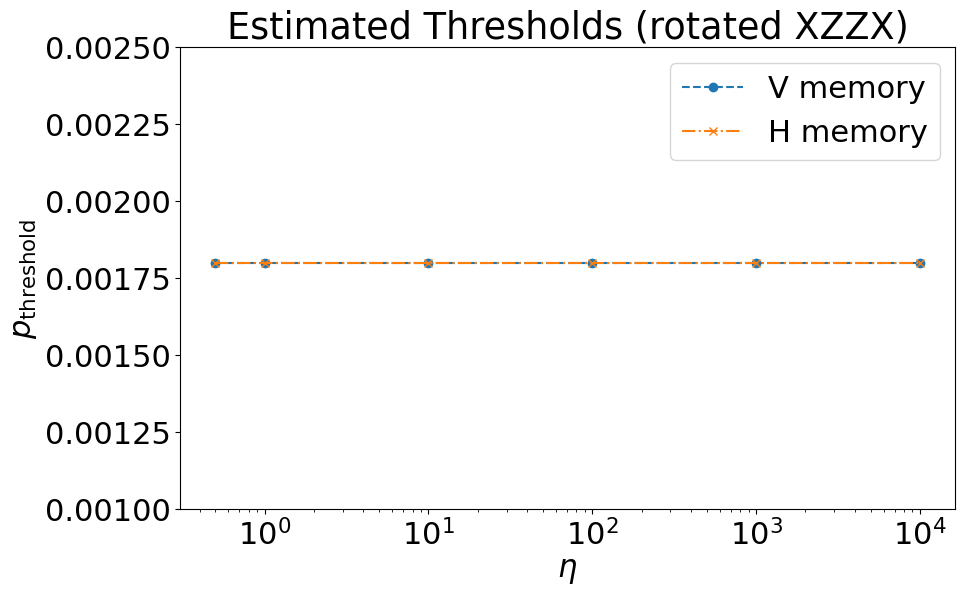

In [ ]:
thresholds = []
for eta in etas:
    stats_V = [stat for stat in stats if stat.json_metadata['memory'] == "V" and stat.json_metadata["eta"] == eta]
    stats_H = [stat for stat in stats if stat.json_metadata['memory'] == "H" and stat.json_metadata["eta"] == eta]
    thresholds.append((eta,
                       estimate_threshold(stats_V, logical_error_per_round=logical_error_per_round),
                       estimate_threshold(stats_H, logical_error_per_round=logical_error_per_round)))

print(thresholds)

# Plot the estimated thresholds
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
etas, V_thresholds, H_thresholds = zip(*thresholds)
ax.plot(etas, V_thresholds, "o--", label='V memory')
ax.plot(etas, H_thresholds, "x-.", label='H memory')
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_title("Estimated Thresholds (rotated XZZX)")
ax.set_xlabel(r"$\eta$")
ax.set_ylabel(r"$p_\mathrm{threshold}$")
ax.legend()
ax.set_ylim([0.001, 0.0025])
plt.rcParams.update({'font.size': 22})
plt.show()



[0.98, 5.88, 35.28, 89.18, 167.58]


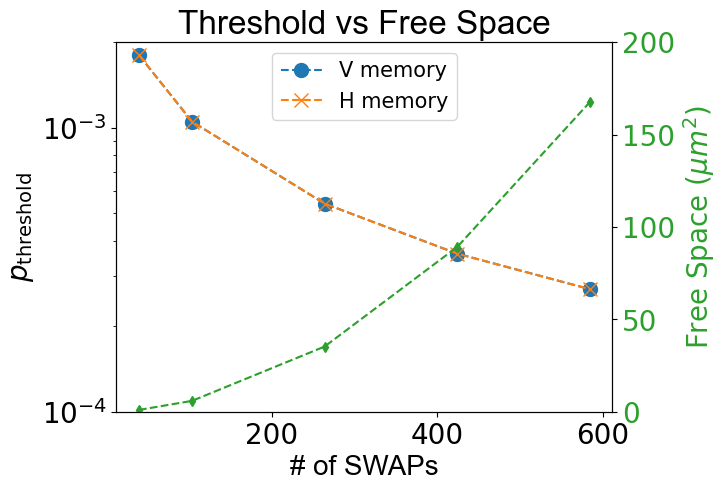

In [37]:
# Determine projected distances from previous plot
# Formulas for number of swaps and connection island size are discussed in the paper

Nx = [2,4,9,14,19]
Ny = [3,5,10,15,20]
pthresh = [0.0018,0.00105,0.00054, 0.00036, 0.00027]
swaps = [4 * 2 * (2*x - 1 + 2*(y - 2)) for x,y in zip(Nx,Ny)]

fig1, ax1 = plt.subplots(1, 1)
plt.plot(swaps,pthresh,'o--',label = "V memory", markersize=10)


pthresh = [0.0018,0.00105,0.00054, 0.00036, 0.00027]

plt.plot(swaps,pthresh,'x--',label = "H memory", markersize=10)


ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

size =[0.49 * (x-1) * (y - 1) for x,y in zip(Nx,Ny)]
color = 'tab:green'
print(size)
ax2.set_ylabel('Free Space ($\mu m^2$)', color=color)  # we already handled the x-label with ax1
ax2.plot(swaps,size,'d--', color=color, markersize=5)
ax2.tick_params(axis='y', labelcolor=color)


#plt.yscale("log")
#plt.semilogy()
ax1.set_ylim(1e-4, 2e-3)
# ax1.grid(which='major')
# ax1.grid(which='minor')
ax1.semilogy()
# ax2.semilogy()
ax2.set_ylim(0, 200)
ax1.legend(prop={'size': 15},loc='upper center')
ax1.set_title("Threshold vs Free Space",fontname='Arial')
ax1.set_xlabel("# of SWAPs",fontname='Arial')
ax1.set_ylabel(r"$p_\mathrm{threshold}$",fontname='Arial' )
plt.rcParams.update({'font.size': 20})
# plt.savefig("threshvsSpace.pdf", format="pdf", bbox_inches="tight")
plt.show()